# Парсинг и предобработка данных

In [1]:
#Импортирование необходимых библиотек
import pandas as pd
import numpy as np
from pprint import pprint
import codecs
import json
import glob
pd.set_option('display.max_columns', None)
from pandas import json_normalize

**1 способ**

In [2]:
#Путь к файлам .geojson
path = 'Data'
file = glob.glob(path + "/*.json")


#Цикл для получения файла и его загрузки, используя json.load 
df_data=[]
for filename in file:
    name = filename.split("\\")[-1][:-5]
    
    with codecs.open(filename, 'r', 'utf-8-sig') as json_file:  
        data = json.load(json_file)
           
    for article in data['refs']:
        if article!=None:
            df_data.append([name, article[0], article[1]['day'], article[1]['month'], article[1]['time']])
            
df_full=pd.DataFrame(data=df_data,columns=['Название файла', 'Пост', 'день публикации', 'месяц публикации', 'время публикации'])

In [3]:
df_full.head(5)

,Название файла,Пост,день публикации,месяц публикации,время публикации
0,Cybersport.Metaratings,7 декабря состоялась церемония награждения лау...,8,декабря,09:30
1,ESforce Holding,7 декабря состоялась церемония награждения лау...,8,декабря,09:30
2,ESforce Holding,Из совместного исследования издателя компьютер...,29,июля,13:50
3,ESforce Holding,По статистике The Esports Observer за I полови...,9,июля,09:33
4,ESforce Holding,Компании SuperData Research и PayPal провели с...,11,апреля,12:43


**2 способ**

In [64]:
#Путь к файлам .geojson
path = 'Data'
file = glob.glob(path + "/*.json")
df_full=pd.DataFrame()

#df_full=pd.DataFrame(columns=['Пост', 'день публикации', 'месяц публикации', 'время публикации'])
#Цикл для получения файла и его загрузки, используя json.load 
for filename in file:
    name = filename.split("\\")[-1][:-5]
    with codecs.open(filename, 'r', 'utf-8-sig') as json_file:  
        data = json.load(json_file)
    
    for article in data['refs']:
        if article != None:
            df=pd.concat(
                [
                    pd.DataFrame([article[0]],columns=['Post']),
                    json_normalize(article[1]),
                    pd.DataFrame([name],columns=['Company'])
                ],
                axis=1
            )
            df_full=pd.concat([df_full,df],axis=0,ignore_index=True)
        

In [65]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Post     1112 non-null   object
 1   day      1112 non-null   object
 2   month    1112 non-null   object
 3   time     1112 non-null   object
 4   Company  1112 non-null   object
dtypes: object(5)
memory usage: 43.6+ KB


In [66]:
df_full.head(20)

,Post,day,month,time,Company
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,Cybersport.Metaratings
1,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,ESforce Holding
2,Из совместного исследования издателя компьютер...,29,июля,13:50,ESforce Holding
3,По статистике The Esports Observer за I полови...,9,июля,09:33,ESforce Holding
4,Компании SuperData Research и PayPal провели с...,11,апреля,12:43,ESforce Holding
5,Минтранс предлагает новую версию законопроекта...,29,марта,10:55,Gett
6,"По информации «РИА Новости», агрегатор такси «...",11,марта,20:20,Gett
7,"Как сообщает издание Wired, с 1 марта 2022 год...",22,февраля,19:49,Gett
8,Китайский агрегатор такси DiDi уйдет с российс...,21,февраля,19:42,Gett
9,"По информации издания «Известия», антимонополь...",7,февраля,15:47,Gett


Датафрейм с информацией о компании

In [68]:
#Путь к файлам .geojson
path = 'Data'
file = glob.glob(path + "/*.json")


df = pd.DataFrame(columns=['rate','subs','industries','about','Company']) 

#Цикл для получения файла и его загрузки, используя json.load 
for filename in file:
    with codecs.open(filename, 'r', 'utf-8-sig') as json_file:  
        data = json.load(json_file)
        name = filename.split("\\")[-1][:-5]   
        try:
            company_info=pd.concat([json_normalize(data['info']),pd.DataFrame([name],columns=['Company'])],axis=1)
        except:
            d={'rate':['Не указано'],'subs':['Не указано'],'industries':['Не указано'],'about':['Не указано']}
            company_info=pd.concat([pd.DataFrame(d),pd.DataFrame([name],columns=['Company'])],axis=1)
    df = pd.concat([df,company_info], axis=0, ignore_index=True)
df.head(20)    
   

,rate,subs,industries,about,Company
0,Не указано,Не указано,Не указано,Не указано,Cybersport.Metaratings
1,Не указано,Не указано,Не указано,Не указано,ESforce Holding
2,Не указано,Не указано,Не указано,Не указано,Gett
3,Не указано,Не указано,Не указано,Не указано,Goose Gaming
4,Не указано,Не указано,Не указано,Не указано,MMA.Metaratings
5,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...,skillbox
6,Не указано,Не указано,Не указано,Не указано,Vinci Agency
7,Не указано,Не указано,Не указано,Не указано,Гэллэри Сервис
8,Не указано,Не указано,Не указано,Не указано,Здоровье.ру
9,47.73,86,"[Веб-разработка, Программное обеспечение, Веб-...",Мы мыслим инновациями\n\r\nГК «Иннотех» — это ...,Иннотех


In [69]:
tk = df_full.merge(df, on='Company',how='left')

In [70]:
tk.shape

(1112, 9)

In [10]:
tk.head(200)

,Post,day,month,time,Company,rate,subs,industries,about
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,Cybersport.Metaratings,Не указано,Не указано,Не указано,Не указано
1,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,ESforce Holding,Не указано,Не указано,Не указано,Не указано
2,Из совместного исследования издателя компьютер...,29,июля,13:50,ESforce Holding,Не указано,Не указано,Не указано,Не указано
3,По статистике The Esports Observer за I полови...,9,июля,09:33,ESforce Holding,Не указано,Не указано,Не указано,Не указано
4,Компании SuperData Research и PayPal провели с...,11,апреля,12:43,ESforce Holding,Не указано,Не указано,Не указано,Не указано
...,...,...,...,...,...,...,...,...,...
195,"Владимир Матасов, выпускник курса Skillbox по ...",14,октября,11:47,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...
196,С какого возраста можно обучать ребенка програ...,13,октября,16:58,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...
197,"Глава Mail.Ru Group Борис Добродеев объявил, ч...",12,октября,11:22,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...
198,Mail.ru Group сообщила об объединении образова...,5,октября,14:15,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...


# Обработка текста

In [71]:
import pymorphy3
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [72]:
sw = stopwords.words('russian')
morph = pymorphy3.MorphAnalyzer()

def clear_text(text):
    text=text.lower()
    text = re.sub(r'[^а-яё ]','', str(text))
    tokens=word_tokenize(text, language="russian")
    tokens = [morph.parse(i)[0].normal_form for i in tokens]
    tokens = [ i for i in tokens if i not in sw and len(i) > 3]
    return tokens

In [73]:
tk['lemmatize_tokens'] = tk['Post'].apply(clear_text)

In [74]:
tk.head(200)

,Post,day,month,time,Company,rate,subs,industries,about,lemmatize_tokens
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,Cybersport.Metaratings,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ..."
1,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ..."
2,Из совместного исследования издателя компьютер...,29,июля,13:50,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[совместный, исследование, издатель, компьютер..."
3,По статистике The Esports Observer за I полови...,9,июля,09:33,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[статистика, половина, впервые, самый, просмат..."
4,Компании SuperData Research и PayPal провели с...,11,апреля,12:43,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[компания, провести, совместный, исследование,..."
...,...,...,...,...,...,...,...,...,...,...
195,"Владимир Матасов, выпускник курса Skillbox по ...",14,октября,11:47,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...,"[владимир, матас, выпускник, курс, вебвёрстка,..."
196,С какого возраста можно обучать ребенка програ...,13,октября,16:58,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...,"[возраст, обучать, ребёнок, программирование, ..."
197,"Глава Mail.Ru Group Борис Добродеев объявил, ч...",12,октября,11:22,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...,"[глава, борис, добродеев, объявить, группа, ко..."
198,Mail.ru Group сообщила об объединении образова...,5,октября,14:15,skillbox,113.82,71000,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",Образовательная платформа Skillbox — один из л...,"[сообщить, объединение, образовательный, платф..."


In [75]:
tk.head()

,Post,day,month,time,Company,rate,subs,industries,about,lemmatize_tokens
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,Cybersport.Metaratings,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ..."
1,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ..."
2,Из совместного исследования издателя компьютер...,29,июля,13:50,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[совместный, исследование, издатель, компьютер..."
3,По статистике The Esports Observer за I полови...,9,июля,09:33,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[статистика, половина, впервые, самый, просмат..."
4,Компании SuperData Research и PayPal провели с...,11,апреля,12:43,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[компания, провести, совместный, исследование,..."


In [76]:
tk['clear_text'] = tk['lemmatize_tokens'].apply(lambda x: " ".join(x))

In [77]:
tk.head()

,Post,day,month,time,Company,rate,subs,industries,about,lemmatize_tokens,clear_text
0,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,Cybersport.Metaratings,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ...",декабрь состояться церемония награждение лауре...
1,7 декабря состоялась церемония награждения лау...,8,декабря,09:30,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[декабрь, состояться, церемония, награждение, ...",декабрь состояться церемония награждение лауре...
2,Из совместного исследования издателя компьютер...,29,июля,13:50,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[совместный, исследование, издатель, компьютер...",совместный исследование издатель компьютерный ...
3,По статистике The Esports Observer за I полови...,9,июля,09:33,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[статистика, половина, впервые, самый, просмат...",статистика половина впервые самый просматриват...
4,Компании SuperData Research и PayPal провели с...,11,апреля,12:43,ESforce Holding,Не указано,Не указано,Не указано,Не указано,"[компания, провести, совместный, исследование,...",компания провести совместный исследование евро...


In [78]:
tk.to_csv('data.csv', index=False)

# Векторизация текста и поиск ngram

In [300]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [334]:
tfidf = TfidfVectorizer(min_df=5,max_df=0.8, ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(tk['clear_text'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names_out())


In [335]:
X_tfidf

<1112x32353 sparse matrix of type '<class 'numpy.float64'>'
	with 726357 stored elements in Compressed Sparse Row format>

In [336]:
print(X_tfidf.shape)

(1112, 32353)


In [337]:
df_tfidf["Company"]=tk["Company"]

 # Кластеризация

In [338]:
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
import plotly.express as px

In [339]:
model = KMeans(n_clusters=5)

In [340]:
reduced_data = PCA(n_components=2).fit_transform(X_tfidf.toarray())
label = model.fit_predict(reduced_data)
df_tfidf["cluster"] = model.predict(reduced_data)

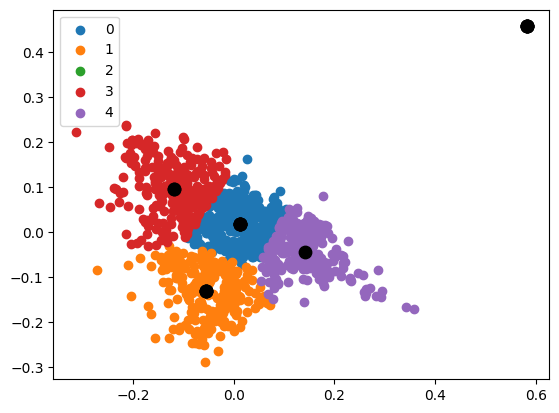

In [341]:
import matplotlib.pyplot as plt
 
 #Getting unique labels
centroids = model.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [342]:
df_tfidf["cluster"]

0       2
1       2
2       4
3       4
4       4
       ..
1107    3
1108    0
1109    3
1110    0
1111    3
Name: cluster, Length: 1112, dtype: int32

In [343]:
tk["cluster"] = df_tfidf["cluster"]

In [344]:
tk1 = tk[tk["cluster"] == 3]
c = 1
for t in tk1:
    c+=1
print(c)
tk1.head(20)

13


,Post,day,month,time,Company,rate,subs,industries,about,lemmatize_tokens,clear_text,cluster
19,"Привет, меня зовут Слава Вершинин. В марте 202...",29,июня,14:02,Gett,Не указано,Не указано,Не указано,Не указано,"[привет, звать, слава, вершинин, март, запусти...",привет звать слава вершинин март запустить про...,3
20,"Привет, Хабр! Меня зовут Георгий Могелашвили. ...",17,июня,13:01,Gett,Не указано,Не указано,Не указано,Не указано,"[привет, хабра, звать, георгий, могелашвили, с...",привет хабра звать георгий могелашвили создате...,3
24,Личные проекты для разработчиков и инженеров –...,11,ноября,18:35,Gett,Не указано,Не указано,Не указано,Не указано,"[личный, проект, разработчик, инженер, важный,...",личный проект разработчик инженер важный интер...,3
26,"Надеюсь, получился достаточно ""кричащий"" загол...",17,октября,05:49,Gett,Не указано,Не указано,Не указано,Не указано,"[надеяться, получиться, достаточно, кричащий, ...",надеяться получиться достаточно кричащий загол...,3
27,Мало какая отрасль современного бизнеса способ...,2,июня,13:52,Gett,Не указано,Не указано,Не указано,Не указано,"[мало, отрасль, современный, бизнес, способный...",мало отрасль современный бизнес способный обой...,3
28,Каждый руководитель сталкивается с вопросами: ...,7,мая,21:57,Gett,Не указано,Не указано,Не указано,Не указано,"[каждый, руководитель, сталкиваться, вопросами...",каждый руководитель сталкиваться вопросамикак ...,3
29,В Ситимобил три подразделения продуктового диз...,30,апреля,15:44,Gett,Не указано,Не указано,Не указано,Не указано,"[ситимобила, подразделение, продуктовый, дизай...",ситимобила подразделение продуктовый дизайн ра...,3
40,До конференции RubyRussia остается совсем немн...,26,сентября,16:42,Gett,Не указано,Не указано,Не указано,Не указано,"[конференция, оставаться, немного, время, успе...",конференция оставаться немного время успеть по...,3
41,Уже в эту субботу встречаемся со всеми рубиста...,25,сентября,09:07,Gett,Не указано,Не указано,Не указано,Не указано,"[суббота, встречаться, весь, рубист, главный, ...",суббота встречаться весь рубист главный конфер...,3
42,28 сентября на конференции RubyRussia Николай ...,20,сентября,15:18,Gett,Не указано,Не указано,Не указано,Не указано,"[сентябрь, конференция, николай, сверчок, выст...",сентябрь конференция николай сверчок выступить...,3


In [345]:
from sklearn.metrics import silhouette_score

In [346]:
print("silhouette_score -", silhouette_score(reduced_data, df_tfidf["cluster"]))

silhouette_score - 0.40668557868791794


# Классификация

In [289]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [347]:
df=pd.read_json("Target.json")
df = df.rename(columns = {"Сompany":"Company"})
df

,Company,Nominations
0,Здоровье.ру,Здоровье и медицина
1,Проект по использованию технологий компьютерно...,Здоровье и медицина
2,Skillbox,"Наука, технологии и инновации"
3,Gett,"Наука, технологии и инновации"
4,Промобот,"Наука, технологии и инновации"
5,Иннотех,"Наука, технологии и инновации"
6,Cybersport.Metaratings,Игровая индустрия и киберспорт
7,MMA.Metaratings,Игровая индустрия и киберспорт
8,Goose Gaming,Игровая индустрия и киберспорт
9,ESforce Holding,Игровая индустрия и киберспорт


In [348]:
df_tfidf["Company"]

0               Cybersport.Metaratings
1                      ESforce Holding
2                      ESforce Holding
3                      ESforce Holding
4                      ESforce Holding
                     ...              
1107    Федерация креативных индустрий
1108    Федерация креативных индустрий
1109    Федерация креативных индустрий
1110    Федерация креативных индустрий
1111    Федерация креативных индустрий
Name: Company, Length: 1112, dtype: object

In [349]:
df_tfidf=df_tfidf.merge(df, on='Company')

In [350]:
df_tfidf['Nominations']

0      Игровая индустрия и киберспорт
1      Игровая индустрия и киберспорт
2      Игровая индустрия и киберспорт
3      Игровая индустрия и киберспорт
4      Игровая индустрия и киберспорт
                    ...              
808              Креативные индустрии
809              Креативные индустрии
810              Креативные индустрии
811              Креативные индустрии
812              Креативные индустрии
Name: Nominations, Length: 813, dtype: object

<Axes: xlabel='Nominations', ylabel='Count'>

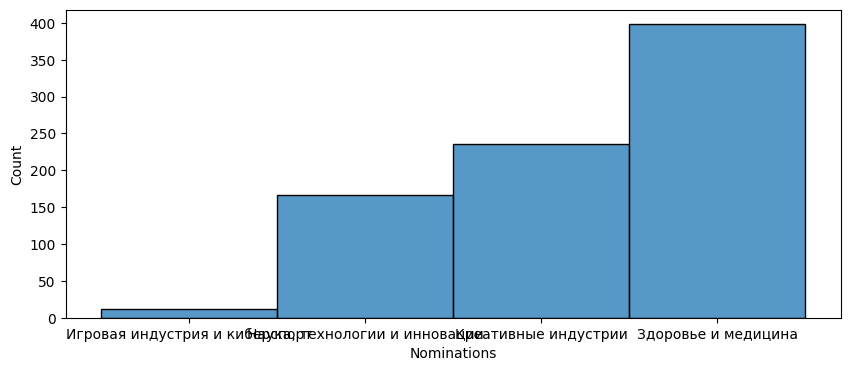

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.histplot(data=df_tfidf,x='Nominations')

In [352]:
from sklearn.model_selection import train_test_split

In [356]:
x=df_tfidf.drop(['Nominations', 'Company'],axis = 1)
y=df_tfidf['Nominations']

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [358]:
from sklearn.tree import DecisionTreeClassifier as Tree


In [359]:
tree = Tree(max_depth=20, min_samples_split=4, min_samples_leaf=2)

In [360]:
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [361]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4)

# Оценка модели

In [362]:
predictions = tree.predict(x_test)

In [363]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8647540983606558


In [364]:
predictions = neigh.predict(x_test)

In [365]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7622950819672131
